In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.style.use("fast")

# 统计量与抽样

## 1. 统计量

在数据的统计分析中，往往需要利用几个选定的样本（sample），得出其所来自的总体（population）的结论。正确的研究设计应该确保样本数据能够代表总体。

总体与样本之间的主要区别在于如何将观测结果分配到数据集中。

![statistic](images/ch02/statistic.png)


### 1.1. 集中程度

|   术语   |      英文       |                    定义                     |          适用          |
| :------: | :-------------: | :-----------------------------------------: | :--------------------: |
| 算数均值 | arithmetic mean |             $\dfrac{∑X_{i}}{n}$             |   对称或近似对称资料   |
| 几何均值 | geometric mean  |             $\sqrt{n}{∏X_{i}}$              | 百分数和比例表示的资料 |
| 调和均值 |  harmonic mean  | $\dfrac{1}{\dfrac{1}{n} ∑\dfrac{1}{X_{i}}}$ | 速度类或有极端值的资料 |
|   中数   |     median      |                    $M_d$                    |      偏峰分布资料      |
|   众数   |      mode       |                    $M₀$                     |                        |


### 1.2. 离散程度

#### 1.2.1. 极差、分位数

- 极差（range）：最大值 - 最小值；
- 分位数（percentile）：多由箱线图表示，简单概括为$5$线$n$点，由上到下依次为：

1. 上边缘：除离群值外的最大值
2. 上四分位数：Q1，逆序排列，第 25% 个数
3. 中位数：Q2
4. 下四分位数：Q3，逆序排列，第 75% 个数
5. 下边缘：除离群值外的最小值

> 若分位数计算结果不是整数，则取下一个整数

- 四分位距（inter-quartile-range，IQR）：Q3 - Q1。< Q1 - 1.5 IQR 或 > Q1 + IQR 为离群值点；

> IQR 无法将所有数据考虑进来，一般使用 $μ ± 2*σ$


#### 1.2.2. 标准差、变异系数

- 方差（variance）：也叫平均平方偏差（mean square deviation）

$$
\mathrm{D} = \frac{∑(X - X̂)^2}{n - 1}
$$

- 标准偏差（standard deviation）

$$
\mathrm{std} = \sqrt{\dfrac{∑(X - X̂)^2}{n - 1}}
$$

> Python 中，NumPy 默认计算总体标准差，即分母为$n$，而 Pandas 默认计算样本标准差

- 变异系数（coefficient of variation）：用于量纲不同但变量间比较。

$$
\mathrm{CV} = \frac{S}{X̂}×100\%
$$

### 1.3. 期望

期望值是该变量总体输出值的均值

- 对离散型分布

$$
𝔼[X] = ∑_{1}^{∞} x_{k}p_{k}
$$

- 对连续型分布

$$
𝔼[X] = ∫_{-∞}^{∞} xf(x) dx
$$

设$a$为常数，$X$和$Y$是两个随机变量，则有

1. 线性：$𝔼[X + Y] = 𝔼[X] + 𝔼[Y]$
2. $𝔼[aX + Y) = a𝔼[X + Y]$
3. 独立性：$X$、$Y$ 相互独立 ⇒ $𝔼[XY) = 𝔼[X]𝔼[Y]$


### 1.4. 方差

设$X$为随机变量，若存在

$$
E\{[X -𝔼[X]]^2\}
$$

则称其为$X$的方差，记作$D(X)$

> 即离均差的平方的期望

- 对离散型分布

$$
D(X) = ∑_{1}^{∞}[x_{k} - 𝔼[X]]^2p_{k}
$$

- 对连续型分布

$$
D(X) = ∫_{-∞}^{∞}[x - 𝔼[X]]f(x) dx
$$

设$a$为常数，$X$和$Y$是两个随机变量

1. $D(X) = 𝔼[X^2] - E^2(X)$
2. $D(aX + b) = a^2D(X)$
3. 独立线性可加：$X$、$Y$相互独立 ⇒ $D(X + Y) = D(X) + D(Y)$
4. $D(X ± Y) = D(X) + D(Y) ± 2Cov(X, Y)$


### 1.5. 协方差

设$X$、$Y$为随机变量，若存在

$$
𝔼[X - 𝔼[X]](Y - 𝔼[Y])
$$

则称其为$X$与$Y$的协方差，记作$Cov(X, Y)$

$$
\begin{aligned}
  Cov(X, Y) &=𝔼[XY] - 𝔼[X]𝔼[Y] \\
  &= \dfrac{∑{(X_{i} - X̄)(Y_{i} - Ȳ)}}{n - 1}
\end{aligned}
$$

1. $Cov(X, X) = D(X)$
2. 参数可交换：$Cov(X, Y) = Cov(Y, X)$
3. 参数线性可加：$Cov(X_1 + X_2, Y) = Cov(X_1, Y) + Cov(X_2, Y)$

协方差构成的矩阵为对称阵

$$
Cov(β) = D(XX^{⊤})^{-1}
$$

其中，$σ^2$是方差，亦为残差的均方误差（MSE）。


## 2. 大数定律

### 2.1. Chebyshev 不等式

设随机变量 $X$ 的 $𝔼[X] = μ, D(X) = σ^2$，则$∀ϵ ∈ ℤ$，存在

$$
P\{|X - μ| ≥ ϵ\} ⩽ \frac{σ^2}{ϵ^2}
$$

即

$$
P\{|X - μ| ⩽ ϵσ\}≥ 1 - \frac{1}{ϵ^2}
$$

- 推论

1. 所有数据，至少 3/4 落在位于均值 2 个标准差范围内
2. 所有数据，至少 8/9 落在位于均值 3 个标准差范围内
3. 所有数据，至少 15/16 落在位于均值 4 个标准差范围内


### 2.2. 几乎确信收敛

当$n → ∞$，在函数$P$下，$X_n(ω)$不收敛到$x₀(ω)$的概率为 0

$$
\lim_{n → ∞} P(|X_n-x₀| ≥ ϵ)=0
$$

则称$X_n$几乎确信收敛$x_0$，记为

$$
X_n → x_0
$$


### 2.3. Kolmogorov 大数定律

也称强大数定律（Strong Law of Large Numbers，SLLN）。

设$X_{i} ∼ i.i.d.$，且期望值$𝔼[X_{i}] = μ(k = 1, 2, ⋯)$，则

$$
P\big\{\lim_{n → ∞} \frac{1}{n} ∑X_{i} = μ\big\} = 1
$$


### 2.3. 依概率收敛

设$X_2, X_2, ⋯$是随机变量序列，若$∀ϵ$，有

$$
\lim_{n → ∞} P(|X_n - x_0| > ϵ)=0
$$

则称$X_n$依概率收敛于$x_0$，记为

$$
X_n \stackrel{p}{→} x_0
$$


### 2.5. Wiener-Khinchin 大数定律

也称弱大数定律（Weak Law of Large Numbers，WLLN）。定律指出：用算术均值来近似实际真值是合理的。

设$X_{i} ∼ i.i.d.$，期望值$𝔼[X_{i}] = μ(i = 1, 2, ⋯)$，则$∀ϵ ∈ ℤ$，存在

$$P\{ |(\frac{1}{n} ∑X_{i}) - μ| ≤ ϵ \} = 1$$

> 当$X_{i}$为服从 0-1 分布，W-K 大数定律即为 Bernoulli 大数定律


## 3. 中心极限定理（CLT）

### 3.1. 依分布收敛

当$X_n$依分布收敛到$x_0$，即$X_n$的 CDF 越来越接近$x_0$的 CDF（随机变量的 PDF 并不总存在）。$\{X_n\}$和$\{x_0\}$是 CDF 分别为$\{F_n(⋅)\}$和$\{F_0(⋅)\}$的随机变量序列，若在$F_0(x)$连续处，$∀x ∈ ℝ$，有

$$
\lim_{n → ∞} F_n(x) = F_0(x)
$$

则当$n → ∞$时，$\{X_n\}$依分布收敛于$\{x_0\}$，记为

$$
X_{n}\stackrel{d}{→} x_0
$$


### 3.2. 独立同分布定理

$n$个独立同分布随机变量之和近似于高斯分布。

当抽样次数足够大（$n ≥ 30$）便有以上性质，这样的总体可看做正态总体。


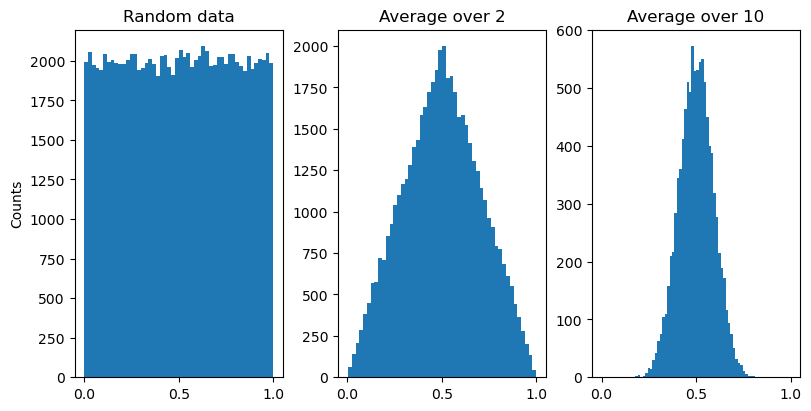

In [2]:
n_data = 100000
n_bins = 50

rng = np.random.default_rng(42)
data = rng.random(n_data)
avg2 = np.mean(data.reshape((n_data // 2, 2)), axis=1)
avg10 = np.mean(data.reshape((n_data // 10, 10)), axis=1)

_, axes = plt.subplots(1, 3, sharex=True, constrained_layout=True, figsize=(8, 4))

axes[0].hist(data, bins=n_bins)
axes[0].set(title="Random data", ylabel="Counts")
axes[1].hist(avg2, bins=n_bins)
axes[1].set(title="Average over 2")
axes[2].hist(avg10, bins=n_bins)
axes[2].set(title="Average over 10")

plt.show()

### 3.3. De Moivre-LaPlace 定理

设随机变量$X_1, X_2, ⋯, X_n\ i.i.d. ∼ B(n, p)$，则$∀ϵ ∈ ℤ$，存在

$$
\lim_{n → ∞}P\big\{\frac{X_n - np}{\sqrt{np(1 - p)}} ⩽ x\big\}  = ∫_{-∞}^x \frac{1}{\sqrt{2π}} e^{\frac{-t^2}{2}} dt = Φ(x)
$$


三种收敛对应大数定律和中央极限定理的三种收敛方式，前者关心的是一阶矩均值，后者不仅关心一阶矩，还关心二阶矩方差，也就是分布。从这个角度来看，矩在某种程度上统一了两者。当 $n$越来越大时，正态分布就变得越来越尖，趋于 ∞ 时，收敛为没有宽度的但无限高的的样子，有意思的是，其曲线下的面积却等于 1，被称为 Dirac-δ 函数，点电荷和点质量等点源和脉冲具有类似的性质。


## 4. 抽样分布

### 4.1. 标准正态分布

对正态分布，当$μ = 0, σ = 1$

$$
f(x) = \frac{1}{\sqrt{2π}} e^{-\frac{x^2}{2}}
$$

称标准正态分布$Φ(x)$，也叫 _Z_ 分布。

$$
Φ(x) = 1 - Φ(-x)
$$

$$
P\{X ⩽ x\} = P\big\{\frac{X̂ - μ}{σ} ⩽ \frac{x - μ}{σ}\big\} = Φ\big(\frac{x - μ}{σ}\big) ∼ 𝒩(0, 1)
$$

> $Φ(x) = 1 - Φ(-x)$

由此得到的统计量，称 _Z_ 统计量。

$$
Z = \frac{X̂ - μ}{σ/\sqrt{n}} ∼ 𝒩(0, 1)
$$


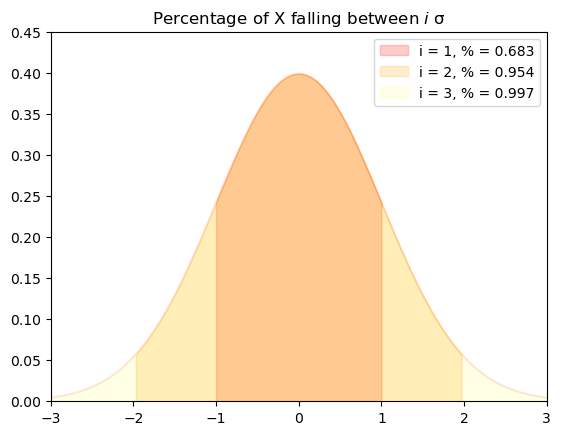

In [3]:
loc, scale = 0, 1
alpha = [0.2, 0.2, 0.1]
colors = ["red", "orange", "yellow"]

_, ax = plt.subplots()

func = stats.norm(loc, scale)
X = np.linspace(-3, 3, 100)
y = func.pdf(X)

ax.plot(X, y, color="r", alpha=alpha[2])

for i in range(3):
    start = loc - scale * (i + 1)
    end = loc + scale * (i + 1)
    y_fall = func.cdf(end) - func.cdf(start)

    X_dist = X[end >= X][X[end >= X] >= start]
    y_dist = func.pdf(X_dist)
    ax.fill_between(
        X_dist,
        y_dist,
        color=colors[i],
        alpha=alpha[i],
        label=f"i = {i + 1}, % = {round(y_fall, 3)}",
    )

ax.set(xlim=(-3, 3), ylim=(0, 0.45), title="Percentage of X falling between $i$ σ")
ax.legend()

plt.show()

- 推论

1. 68.27\% 的数据落在距离均值 1 个标准差内
2. 95.44\% 的数据落在距离均值 2 个标准差内
3. 99.74\% 的数据落在距离均值 3 个标准差内


### 4.2. 抽样均值

- 抽样均值

$$
μ_{X̂} = μ
$$

- 标准误差（standard error of the mean，SEM）：系数标准偏差的估计值。

$$
\mathrm{sem} = \frac{σ}{\sqrt{n}}
$$

- 抽样方差

$$
\mathrm{D}_{X̂} = \frac{\mathrm{D}}{n}
$$


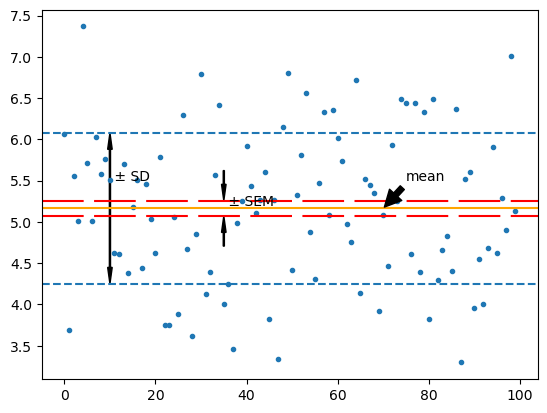

In [4]:
x = rng.normal(size=100) + 5

std = np.std(x, ddof=1)
sem = stats.sem(x)

sd = np.mean(x) + std * np.r_[-1, 1]
se = np.mean(x) + sem * np.r_[-1, 1]

_, ax = plt.subplots()

ax.plot(x, ".")
ax.axhline(np.mean(x), color="orange")
ax.axhline(sd[0], ls="--")
ax.axhline(sd[1], ls="--")

dashes = [20, 5]
ax.axhline(se[0], ls="--", color="r").set_dashes(dashes)
ax.axhline(se[1], ls="--", color="r").set_dashes(dashes)

arrow = {
    "width": 0.25,
    "length_includes_head": True,
    "head_length": 0.2,
    "head_width": 1,
    "color": "k",
}

ax.arrow(10, np.mean(x), 0, std, **arrow)
ax.arrow(10, np.mean(x), 0, -std, **arrow)
ax.arrow(35, np.mean(x) - 5 * sem, 0, 4 * sem, **arrow)
ax.arrow(35, np.mean(x) + 5 * sem, 0, -4 * sem, **arrow)

ax.text(10, 5.5, " ± SD", fontsize="medium")
ax.text(35, 5.2, " ± SEM", fontsize="medium")
ax.annotate(
    text="mean",
    xy=(70, np.mean(x)),
    xycoords="data",
    fontsize="medium",
    xytext=(75, 5.5),
    textcoords="data",
    arrowprops={"facecolor": "black", "shrink": 0.05},
)

plt.show()

### 4.3. 独立分布之和

$$
l(y) = ∫_{-∞}^{∞}f(x, y-x) dx
$$

由定义可得

$$
\begin{aligned}
  &X_{i} ∼ B(n_{i}, p) &⇒ &∑∼ B(∑n_{i}, p) \\
  &X_{i} ∼ 𝒩(μ_{i}, σ_{i}^2) &⇒ &∑∼ 𝒩(∑μ_{i}, ∑σ_{i}^2) \\
  &X_{i} ∼ χ^2(i) &⇒ &∑∼ χ^2(∑i)
\end{aligned}
$$


#### 4.3.1. $χ^2$分布

$χ^2$分布用于描述高斯分布数据间的相关性（独立性）。

若$∀X_{i} ∼ iid.\ 𝒩(0, σ^2)$的随机变量，则

$$
χ^2(n) = ∑\dfrac{X_{i}^2}{σ^2}
$$

由$Γ$函数定义

$$
\begin{cases}
  \dfrac{1}{Γ(\frac{n}{2})⋅2^{\frac{n}{2}}} e^{- \frac{x}{2}}⋅x^{(\frac{n}{2} -1)}, && x > 0 \\
  0, && x⩽ 0
\end{cases}
$$

当$X_{i} ∼ 𝒩(0, 1)$，则

$$
Y = ∑X_{i}^2 ∼ χ^2(n)
$$


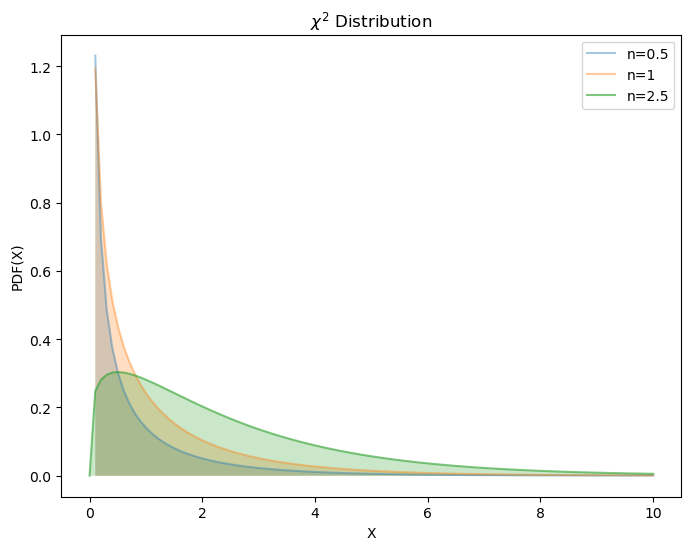

In [5]:
locs = [0.5, 1, 2.5]
alphas = [0.4, 0.4, 0.6]

X = np.linspace(0, 10, 100)

_, ax = plt.subplots(figsize=(8, 6))

for loc, alpha in zip(locs, alphas):
    y = stats.chi2.pdf(X, df=loc)
    ax.plot(X, y, label=f"n={loc}", alpha=alpha)
    ax.fill_between(X, y, alpha=0.25)

ax.set(xlabel="X", ylabel="PDF(X)", title="$χ^2$ Distribution")
ax.legend()

plt.show()

由$Γ$函数性质，其具有

1. 取值非负性
2. 线性可加性
3. 均值为 $n$，方差为 $2n$


### 4.4. 独立分布之商

$$
l(y) = ∫₀^{∞} x_1 f_1(x_1)f_2(x_1, y) dx_1
$$


#### 4.4.1. $t$分布

$t$分布，又称学生 $t$分布，是来自正态总体的样本均值的分布。通常用于小样本数，当总体均值及标准差未知时。$t$分布的实质是，用样本方差$S$估计总体方差$σ$，也就是用标准误差（sem）代替 _Z_ 统计量中的标准差。

$$
t
= \frac{X̄ - μ}{S/\sqrt{n}}
= \frac{X̄ - μ}{\mathrm{sem}}
∼ t(n-1)
$$

> 由 CLT 可知，样本均值 $x̄ ∼ 𝒩(μ, \dfrac{σ^2}{n})$。

由于$t$分布的尾部长于高斯分布，因此受极端情况的影响要小得多

![t-normal](images/ch02/t-normal.png)


当$X_1 ∼ χ^2(n), X_2 ∼ 𝒩(0, 1)$，则

$$
\frac{X_2}{\sqrt{X_1/n}} ∼ t(n)
$$

令$Z= \sqrt{X_1/n}$，则

$$
g(Z) = 2nZ k_n(nZ^2)
$$

可得，概率密度函数

$$
h(t) = \frac{Γ[(n + 1)/2]}{\sqrt{π n}Γ(n/2)}\big(1 + \dfrac{t^2}{n}\big)^{- \frac{(n + 1)}{2}}
$$


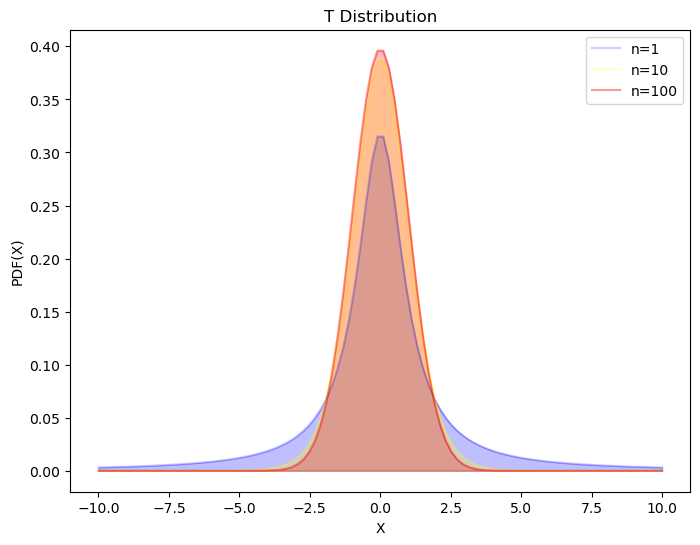

In [6]:
locs = [1, 10, 100]
alphas = [0.2, 0.2, 0.4]
colors = ["blue", "yellow", "red"]

X = np.linspace(-10, 10, 100)

_, ax = plt.subplots(figsize=(8, 6))

for loc, color, alpha in zip(locs, colors, alphas):
    y = stats.t.pdf(X, df=loc)
    ax.plot(X, y, label=f"n={loc}", color=color, alpha=alpha)
    ax.fill_between(X, y, color=color, alpha=0.25)

ax.set(xlabel="X", ylabel="PDF(X)", title="T Distribution")
ax.legend()

plt.show()

- 性质

1. 对称性：_t_ 分布关于 $t = 0$ 对称
2. _t_ 分布曲线的离散程度与自由度呈 $n$ 负相关
3. $n → ∞, \ t(n) → 𝒩(0, 1)$


#### 4.4.2. _F_ 分布

_F_ 分布用于比较两组高斯分布数据的可变性，并确定方差分析的临界值，即判断两个总体是否有相同的方差。

当$X_{i} ∼ χ^2(i)$，则

$$
\frac{X_2/m}{X_1/n} ∼ F(m, n)
$$


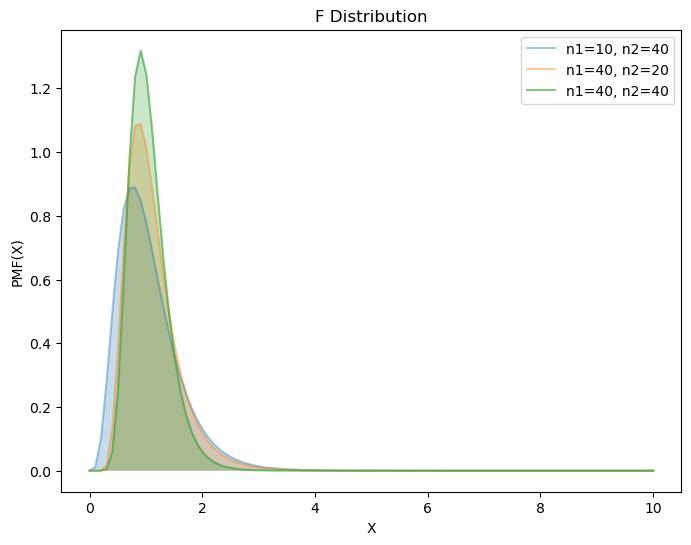

In [7]:
locs = [10, 40, 40]
loc2s = [40, 20, 40]
alphas = [0.4, 0.4, 0.6]

X = np.linspace(0, 10, 100)

_, ax = plt.subplots(figsize=(8, 6))

for loc, loc2, alpha in zip(locs, loc2s, alphas):
    y = stats.f.pdf(X, dfn=loc, dfd=loc2)
    ax.plot(X, y, label=f"n1={loc}, n2={loc2}", alpha=alpha)
    ax.fill_between(X, y, alpha=0.25)

ax.set(xlabel="X", ylabel="PMF(X)", title="F Distribution")
ax.legend()

plt.show()

- 性质

1. 如$F ∼ F(m, n)$，则$1/F ∼ F(n, m)$
2. 若$t ∼ t(n)$，则$t^2 ∼ F(1, n)$

当$X_{i} ∼ 𝒩(μ, σ^2)$，则

$$
\frac{S^2}{σ^2/(n - 1)} ∼ χ^2(n - 1)
$$

$$
\frac{X̂ - μ}{S/\sqrt{n}} ∼ t(n - 1)
$$

当$X_{i} ∼ 𝒩(μ_1, σ_1^2), Y_{j} ∼ 𝒩(μ_2, σ_2^2)$，则

$$
∑\big[\dfrac{(Y_{j} - Ȳ)}{σ_2^2(m - 1)} \big]/\big[\dfrac{X_{i} - X̄}{σ_1^2(n - 1)} \big] ∼ F(m - 1, n - 1)
$$

- 当$σ_1^2 = σ_2^2$

$$
∑[(X̄ - Ȳ) -(μ_1 - μ_2)]⋅\sqrt{\big[\dfrac{n + m-2}{1/n + 1/m}\big]} /\sqrt{\big[∑(X_{i} - X̂) + ∑(Y_{i} - Ȳ)\big]} ∼ t(n + m - 2)
$$


### 4.5. 小结

抽样分布的前提设是总体相互独立

| 样本分布  |     总体分布      |  偏离量分布  |         统计量          |
| :-------: | :---------------: | :----------: | :---------------------: |
| $χ^2$分布 | $X_{i} ∼ 𝒩(0, 1)$ |              |       $∑X_{i}^2$        |
|  $t$分布  |   $X ∼ 𝒩(0, 1)$   | $Y ∼ χ^2(n)$ | $\dfrac{X}{\sqrt{Y/n}}$ |
|  $F$分布  |   $X ∼ χ^2(m)$    | $Y ∼ χ^2(n)$ |   $\dfrac{X/m}{Y/n}$    |
